# Web Scraping

In [1]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

In [2]:
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
r = requests.get(url)
html_content = r.content
# print(html_content)

In [3]:
soup = BeautifulSoup(html_content,'html.parser')
# print(soup.prettify)

In [4]:
title = soup.title
print(title)
# print(type(soup))
# print(type(title.string))
# type(title)

<title>Election Commission of India</title>


In [5]:
print(soup.find('table'))

<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>
<tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                              

In [6]:
data = []
for row in soup.find_all('tr'):
    cols = row.find_all(['td', 'th'])
    if len(cols) == 4 and cols[0].text.strip() != 'Total':
        party = cols[0].text.strip()
        won = cols[1].text.strip()
        leading = cols[2].text.strip()
        total = cols[3].text.strip()
        data.append([party, won, leading, total])

print(f"Extracted data: {data}")

Extracted data: [['Party', 'Won', 'Leading', 'Total'], ['Bharatiya Janata Party - BJP', '240', '0', '240'], ['Indian National Congress - INC', '99', '0', '99'], ['Samajwadi Party - SP', '37', '0', '37'], ['All India Trinamool Congress - AITC', '29', '0', '29'], ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22'], ['Telugu Desam - TDP', '16', '0', '16'], ['Janata Dal  (United) - JD(U)', '12', '0', '12'], ['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9'], ['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8'], ['Shiv Sena - SHS', '7', '0', '7'], ['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5'], ['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4'], ['Rashtriya Janata Dal - RJD', '4', '0', '4'], ['Communist Party of India  (Marxist) - CPI(M)', '4', '0', '4'], ['Indian Union Muslim League - IUML', '3', '0', '3'], ['Aam Aadmi Party - AAAP', '3', '0', '3'], ['Jharkhand Mukti Morcha - JMM', '3', '0', '3'], ['Janasena Party - JnP', '2',

In [7]:
with open('election_results.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerows(data)

In [8]:
try:
    df = pd.read_csv('election_results.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('election_results.csv', encoding='ISO-8859-1')


In [11]:
print(f"DataFrame shape: {df.shape}") 
print(f"DataFrame contents:\n{df}")

DataFrame shape: (42, 4)
DataFrame contents:
                                                Party  Won  Leading  Total
0                        Bharatiya Janata Party - BJP  240        0    240
1                      Indian National Congress - INC   99        0     99
2                                Samajwadi Party - SP   37        0     37
3                 All India Trinamool Congress - AITC   29        0     29
4                     Dravida Munnetra Kazhagam - DMK   22        0     22
5                                  Telugu Desam - TDP   16        0     16
6                        Janata Dal  (United) - JD(U)   12        0     12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9        0      9
8   Nationalist Congress Party – Sharadchandra Paw...    8        0      8
9                                     Shiv Sena - SHS    7        0      7
10             Lok Janshakti Party(Ram Vilas) - LJPRV    5        0      5
11      Yuvajana Sramika Rythu Congress Party - YSRCP  

# Top Insights


In [33]:
insights = []

# 1. Total number of parties
insights.append(f"1. Total number of parties: {len(df)}")

# 2. Party with the most seats
most_seats_party = df.loc[df['Total'].idxmax(), 'Party']
most_seats = df['Total'].max()
insights.append(f"2. Party with the most seats: {most_seats_party} ({most_seats} seats)")

# 3. Party with the least seats
least_seats_party = df.loc[df['Total'].idxmin(), 'Party']
least_seats = df['Total'].min()
insights.append(f"3. Party with the least seats: {least_seats_party} ({least_seats} seats)")

# 4. Total seats won
total_seats_won = df['Won'].sum()
insights.append(f"4. Total seats won: {total_seats_won}")

# 5. Percentage of seats won by the leading party
leading_party_percentage = (most_seats / total_seats_won) * 100
insights.append(f"5. Percentage of seats won by the leading party: {leading_party_percentage:.2f}%")

# 6. Average seats won per party
avg_seats = df['Won'].mean()
insights.append(f"6. Average seats won per party: {avg_seats:.2f}")

# 7. Difference in seats between top two parties
df_sorted = df.sort_values('Total', ascending=False)
seat_difference = df_sorted.iloc[0]['Total'] - df_sorted.iloc[1]['Total']
insights.append(f"7. Difference in seats between top two parties: {seat_difference}")

# 8. Parties with more than 50 seats
parties_over_50 = df[df['Total'] > 50]['Party'].tolist()
insights.append(f"8. Parties with more than 50 seats: {', '.join(parties_over_50)}")

top_5_parties = df_sorted.head(5)[['Party', 'Total']].values.tolist()
insights.append("9. Top 5 parties by total seats:")
for i, (party, seats) in enumerate(top_5_parties, start=1):
    insights.append(f"    {i}. {party}: {seats} seats")
    
# 10. Percentage of total seats for each party
df['Percentage'] = (df['Total'] / df['Total'].sum()) * 100
percentages = df[['Party', 'Percentage']].values.tolist()
insights.append("10. Percentage of total seats for each party:")
for party, percentage in percentages:
    insights.append(f"   - {party}: {percentage:.2f}%")

# Print insights
print("\nInsights:")
for insight in insights:
    print(insight)


Insights:
1. Total number of parties: 42
2. Party with the most seats: Bharatiya Janata Party - BJP (240 seats)
3. Party with the least seats: United People’s Party, Liberal - UPPL (1 seats)
4. Total seats won: 543
5. Percentage of seats won by the leading party: 44.20%
6. Average seats won per party: 12.93
7. Difference in seats between top two parties: 141
8. Parties with more than 50 seats: Bharatiya Janata Party - BJP, Indian National Congress - INC
9. Top 5 parties by total seats:
    1. Bharatiya Janata Party - BJP: 240 seats
    2. Indian National Congress - INC: 99 seats
    3. Samajwadi Party - SP: 37 seats
    4. All India Trinamool Congress - AITC: 29 seats
    5. Dravida Munnetra Kazhagam - DMK: 22 seats
10. Percentage of total seats for each party:
   - Bharatiya Janata Party - BJP: 44.20%
   - Indian National Congress - INC: 18.23%
   - Samajwadi Party - SP: 6.81%
   - All India Trinamool Congress - AITC: 5.34%
   - Dravida Munnetra Kazhagam - DMK: 4.05%
   - Telugu Desa

# Visualizations


In [34]:
plt.style.use('seaborn-darkgrid')
colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(df)))
custom_palette = sns.color_palette(colors)

# Total seats won by each party

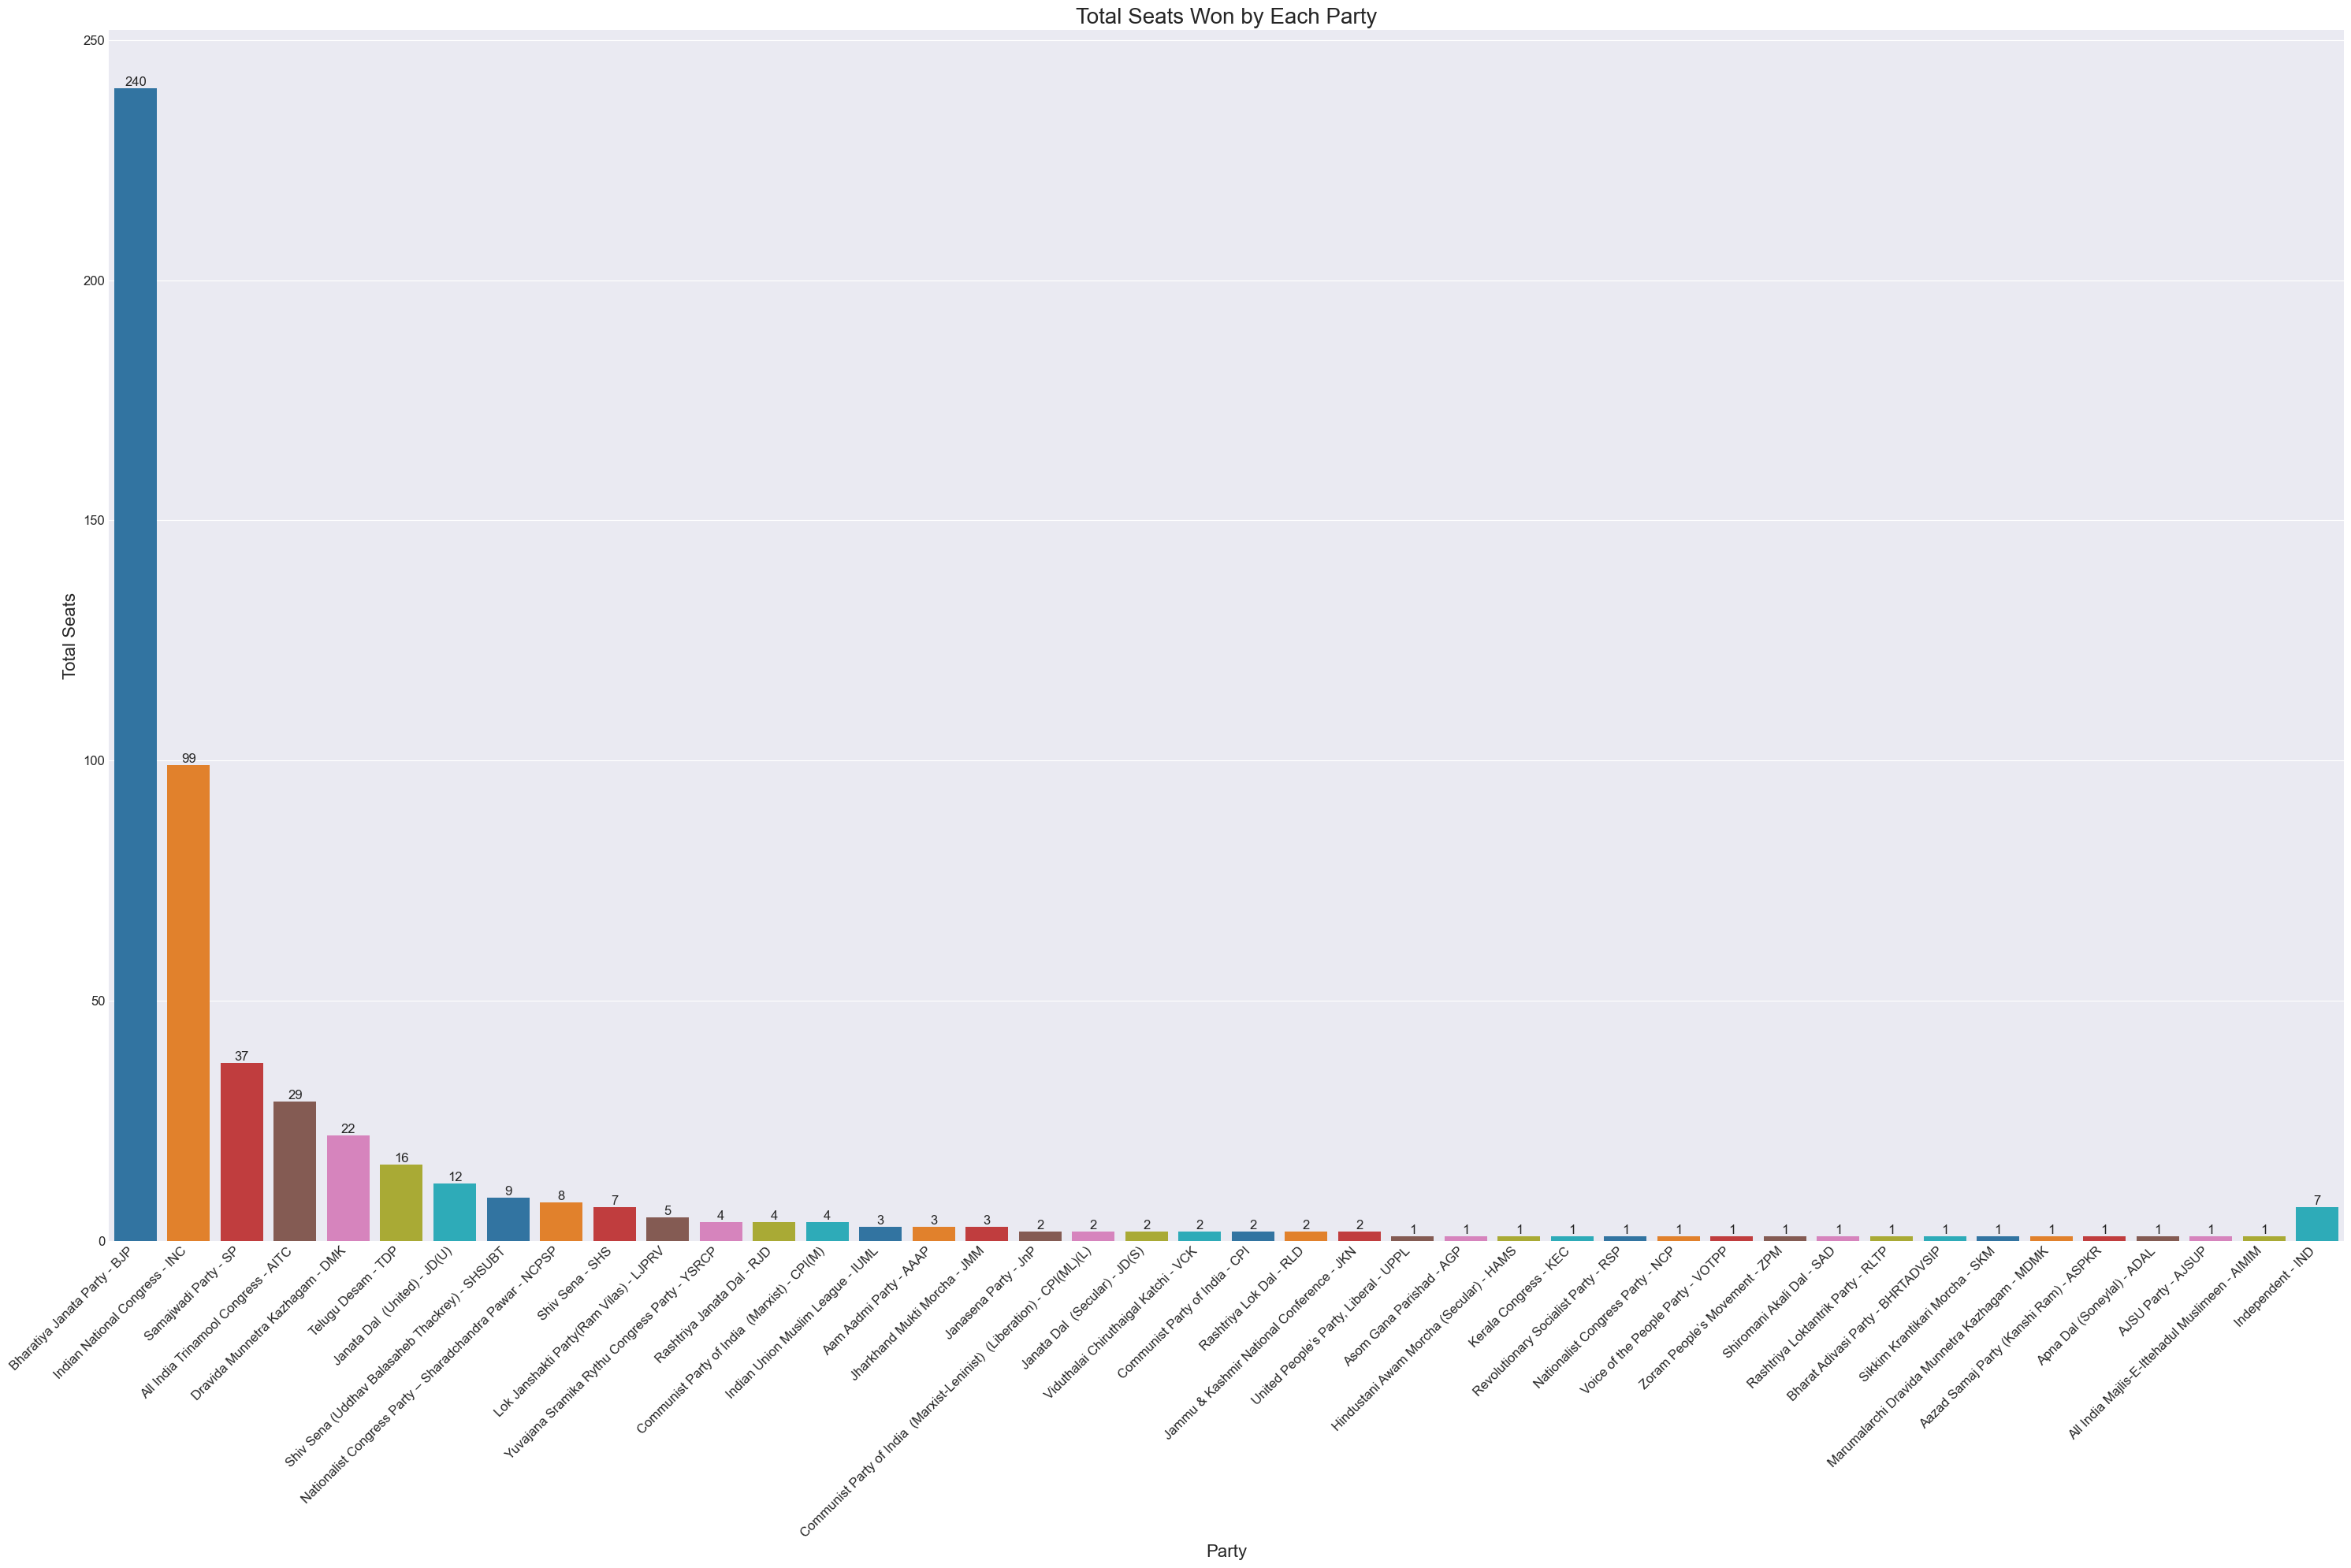

In [37]:
plt.rcParams['figure.figsize'] = [30, 20]

# 1. Bar chart of total seats won by each party
plt.figure()
ax = sns.barplot(x='Party', y='Total', data=df, palette=custom_palette)
plt.title('Total Seats Won by Each Party', fontsize=20)
plt.xlabel('Party', fontsize=16)
plt.ylabel('Total Seats', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for i, v in enumerate(df['Total']):
    ax.text(i, v, str(int(v)), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

# Top 6 parties

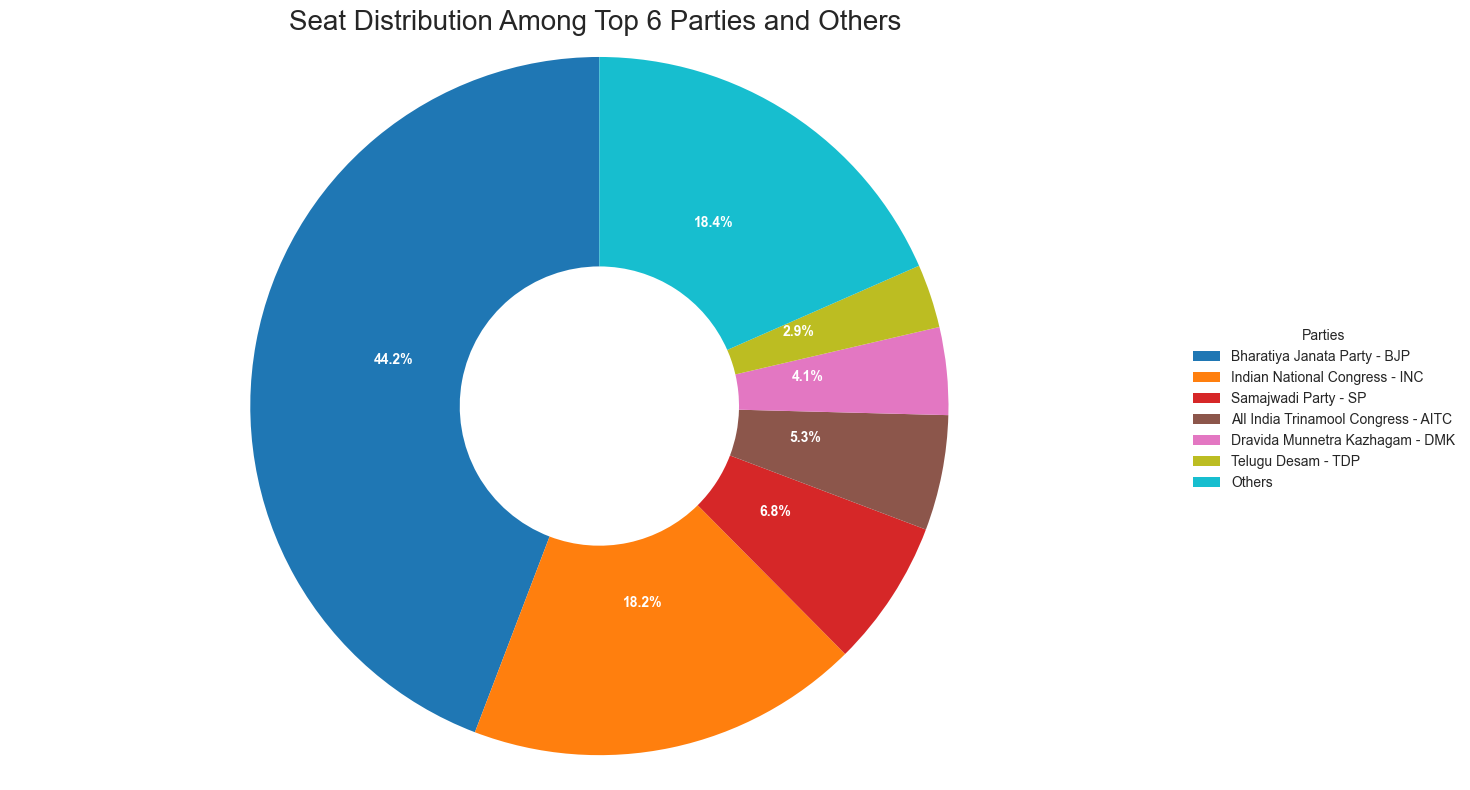

In [42]:
df_sorted = df.sort_values('Total', ascending=False).reset_index(drop=True)

top_6 = df_sorted.head(6)
others = pd.DataFrame({
    'Party': ['Others'],
    'Total': [df_sorted.iloc[6:]['Total'].sum()]
})

pie_data = pd.concat([top_6, others]).reset_index(drop=True)

plt.style.use('seaborn-darkgrid')

colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, len(pie_data)))
custom_palette = sns.color_palette(colors)

plt.figure(figsize=[12, 8])

wedges, texts, autotexts = plt.pie(pie_data['Total'], 
                                   labels=None,  
                                   autopct=lambda pct: f'{pct:.1f}%\n' if pct > 2 else '',
                                   startangle=90, 
                                   colors=custom_palette,
                                   wedgeprops=dict(width=0.6)) 

plt.title('Seat Distribution Among Top 6 Parties and Others', fontsize=20)

plt.setp(autotexts, size=10, weight="bold",color="white")
plt.setp(texts, size=12)

centre_circle = plt.Circle((0,0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  
plt.tight_layout()

plt.legend(wedges, pie_data['Party'],
           title="Parties",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()